## Предварительный анализ данных. Обработка и принципы работы.
**Предварительный анализ данных** — это процесс, в ходе которого производится оценка и изучение собранной информации с целью определения её характеристик, выявления возможных ошибок и ограничений, а также приведения данных к нужному формату. Этот этап исследования позволяет понять качество и достоверность данных, выбрать подходящие методы анализа и спланировать дальнейшие шаги.   
Алгоритм предобработки данных меняется в зависимости от задачи, но в общем виде выглядит следующим образом:  

[![2024-11-05-13-04-37.png](https://i.postimg.cc/3wHdcrHR/2024-11-05-13-04-37.png)](https://postimg.cc/0zck6sjR)

Предобработка является важнейшим этапом анализа данных, и если она не будет выполнена, то дальнейший анализ в большинстве случаев невозможен из-за того, что аналитические алгоритмы просто не смогут работать или результаты их работы будут некорректными. Иными словами, реализуется принцип GIGO — garbage in, garbage out (мусор на входе, мусор на выходе).

[![garbage-in-garbage-out.jpg](https://i.postimg.cc/MKY7dpBx/garbage-in-garbage-out.jpg)](https://postimg.cc/xccNdYgF)

Рассмотрим основные этапы предобработки данных:
#### 1. Изучение данных  
На данном этапе анализируется формат хранения данных и методы приведения к необходимому формату (например, данные могут храниться в формате JSON, PDF, базе и т.д., а представить результаты необходимо в Excel), также оценивается соответсвие предметной области, качество данных и типы переменных.    
Отдельное место в процессе изучения данных занимает вопрос качества данных. **Data quality (качество данных)** — это мера состояния данных по нескольким измерениям, таким как точность, полнота, согласованность, надежность. Например, в компании прогнозируют, что обзвонив всех клиентов и предложив им свои продукты удастся достичь максимальной прибыли за все времена, для этого закупаются телефоны, нанимаются операторы, но на конечном этапе сотрудники видят, что в базе данных произошел сбой и все телефоны  выглядят следующим образом: ÿ¿α«¬á∩ φ½Ñ¬Γα, соответсвенно компания остается в минусе.  
Независимо от того, какие факторы снижения качества присутствуют в данных, с ними необходимо бороться. Это делается в два этапа:
- **Data profiling (профилирование данных)** – это процесс изучения и анализа данных для лучшего понимания их структуры, качества и взаимосвязей. Этот метод широко используется в аналитике данных и помогает улучшить качество работы с данными, выявить аномалии и определить проблемы в источниках данных.  
- Очистка

 #### 2. Очистка данных  
Очистка производится с целью исключения различного рода факторов, снижающих качество данных и мешающих работе аналитических алгоритмов. Она включает:  
**1. Работа с пропущенными значениями**  
Обработка пропущенных значений зависит от типа данных (категориальный или числовой)
- Пропуски в категориальных переменных можно заменить либо на самое популярное значение в категории, либо ввести новую категорию "Неизвестно"/"Не указан"
- Пропуски в численных признаках предпочтительнее заменять медианой, либо при отсутсвии выбросов средним значением  
Если в столбце много пропусков и он не повлияет на результаты анализа, то его можно удалить.

**2. Обработка дублирующихся записей**

**3 .Работа с выбросами**  
Выбросы – это данные, которые существенно отличаются от других наблюдений. Они могут соответствовать реальным отклонениям, но могут быть и просто ошибками.  
Выбросы у численных данных можно обнаружить следующим образом:  
- Графический метод - диаграмма ящик с усами
- Метод IQR (межквартильный размах) — способ определения выбросов, основанный на квартилях. Межквартильный размах определяется как разница между нижним (Q1) и верхним (Q3) квартилями. Выбросы определяются как значения, находящиеся за пределами 1,5 IQR от Q1 и Q3. **Квартиль** – это величина, характеризующая количество измерений, входящих в обозначенную часть совокупности.  
[![diagramma-razmaha.png](https://i.postimg.cc/7Lsq8xVF/diagramma-razmaha.png)](https://postimg.cc/p9FwKM3C) 
- Также существуют более углубленные статистические методы для работы с выбросами (тест Граббса, Тест Рознера, Z-оценка)

Рассмотрим на примере основные методы работы с качеством данных

In [1]:
import pandas as pd # Загружаем библиотеку для работы с датафреймом
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # Загружаем библиотеки для работы с визуализацией 
# Возьмем сгенерированные данные о результатах теста учащихся школы
# Ссылка на датасет: https://www.kaggle.com/datasets/desalegngeb/students-exam-scores
df = pd.read_csv('Expanded_data_with_more_features.csv') # Импортируем данные при помощи функции pd.read_csv
df.head() # Проверяем загрузку

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [2]:
# стобец Unnamed: 0 дублирует индекс, поэтому его можно удалить
del df['Unnamed: 0']

**Показатели:**  
Gender              - Пол ученика  
EthnicGroup         - Этническая группа (от А до Е)  
ParentEduc          - Образование родителей (от средней школы до магистратуры)  
LunchType           - Тип школьного обеда (стандартный/бесплатный)  
TestPrep            - Пройден ли курс подготовки к экзамену (да/нет)  
ParentMaritalStatus - Семейное положение родителей (женат/холост/вдовец/разведен)  
PracticeSport       - Как часто ученик занимается спортом (никогда/иногда/регулярно)  
IsFirstChild        - Является ли ребенок первым в семье (да/нет)  
NrSiblings          - Количество братьев и сестер у ученика (от 0 до 7)  
TransportMeans      - Транспорт в школу (автобус/частный)  
WklyStudyHours      - Еженедельное количество часов самостоятельного обучения (менее 5 часов/от 5 до 10 часов/более 10 часов)  
MathScore           - Результат теста по математике (от 0 до 100)  
ReadingScore        - Оценка теста по чтению (от 0 до 100)  
WritingScore        - Результат теста по письму (от 0 до 100) 

In [3]:
df.shape # К-во записей в датасете выводится при помощи функции .shape

(30641, 14)

In [4]:
df.info() # Проверим данные на пропущенные значения, для этого используем функцию .info()
# По параметру Non-Null Count видим, что 9 столбцов содержат пропущенные значения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


<Axes: >

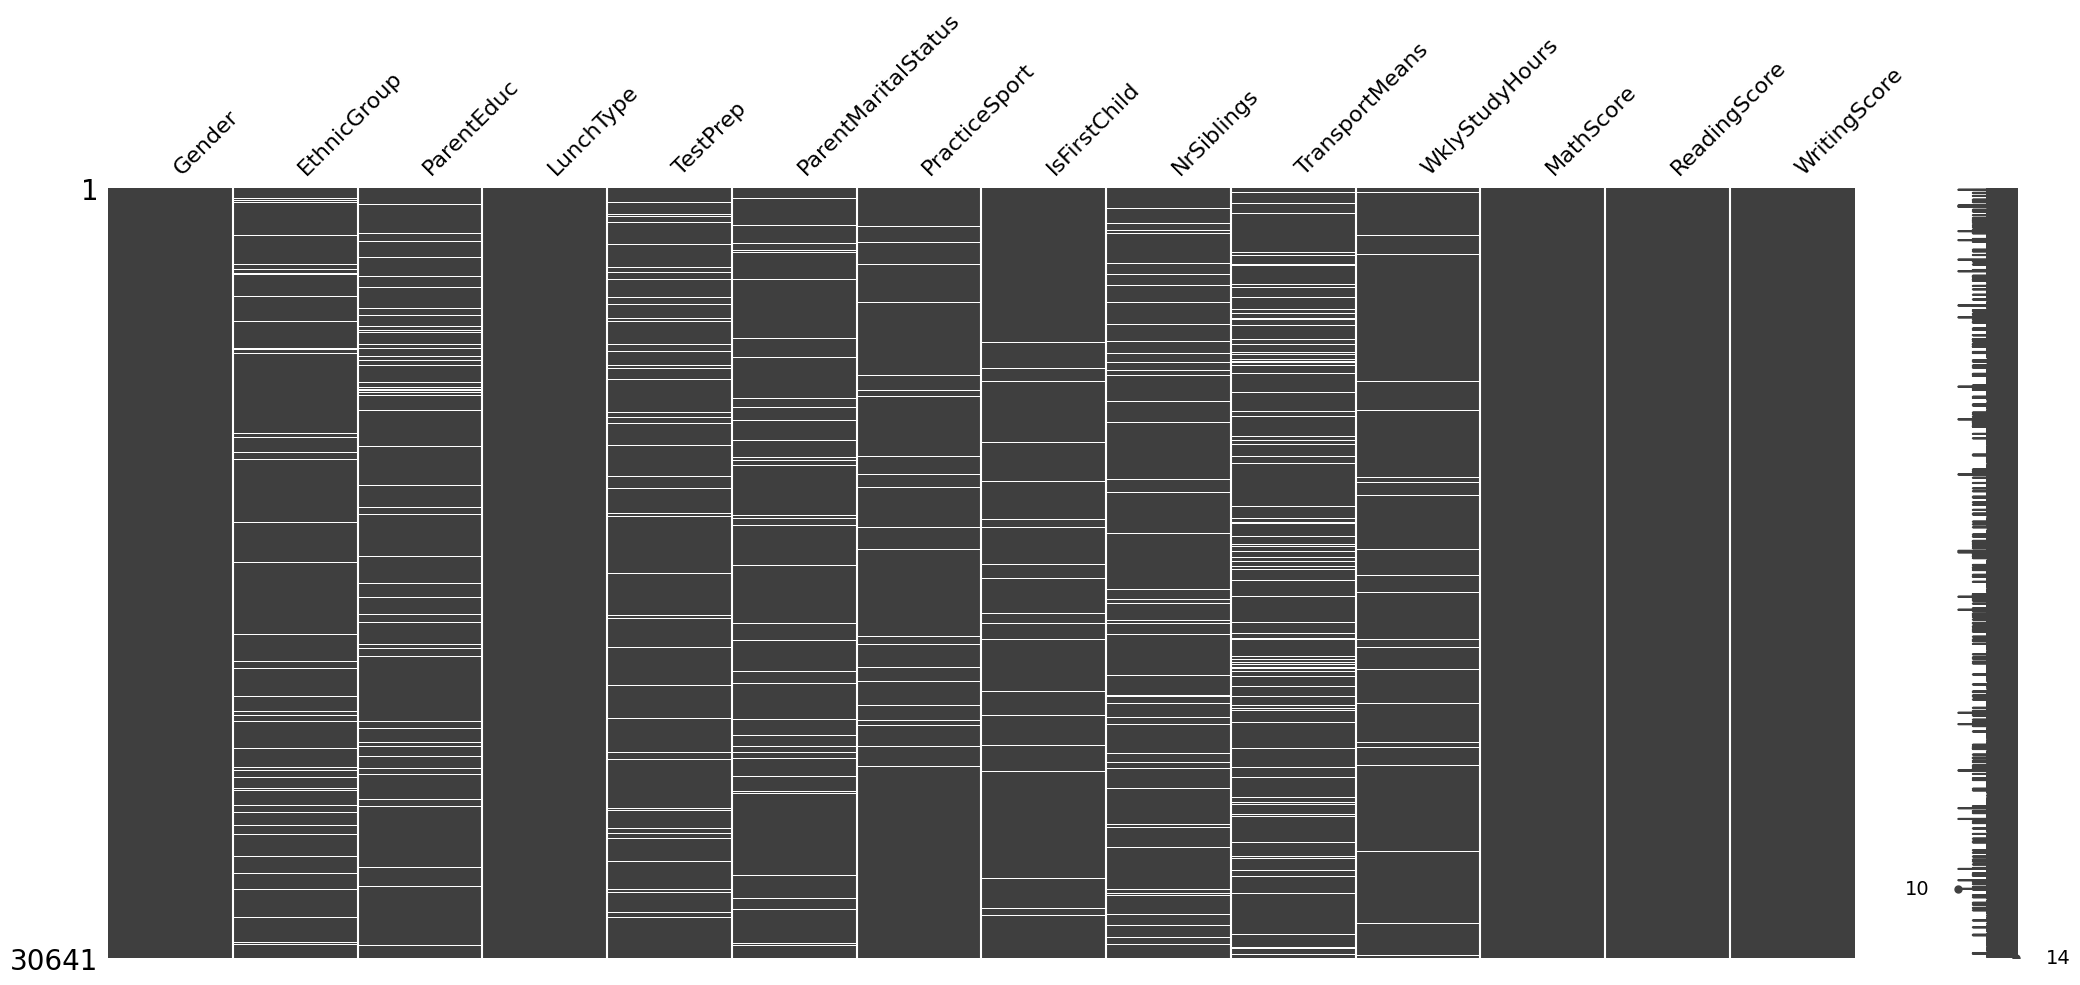

In [5]:
# Также для отображения пропущенных значений можно использовать визуализацию
# Пропущенные значения выделяются белыми строками
import missingno as msno # Импорт библиотеки для анализа пропущенных значений
msno.matrix(df) # Построение графика

In [6]:
# Для заполнения пропущенных значений используем метод .fillna(), заполняющий строки со значением NaN
df['NrSiblings'] = df['NrSiblings'].fillna(df['NrSiblings'].median()) # Показатель NrSiblings заполняем медианой
df['PracticeSport'] = df['PracticeSport'].fillna('Не указан') # Показатели PracticeSport заполняем новой категорией "Не указан"
# Для остальных показателей вычислим самое частое значение (мода) и заполним пропуски
# Создаем список со столбцами, которые необходимо заполнить
list_columns = ['EthnicGroup','ParentEduc', 'TestPrep','ParentMaritalStatus', 'IsFirstChild', 'TransportMeans', 'WklyStudyHours']
for i in list_columns:
    mode_column_i = df[i].mode()[0]  # Вычисляем в цикле моду для столбца
    df[i] = df[i].fillna(mode_column_i) # Заполняем пропущенные значения 

In [7]:
# Проверим данные на наличие дубликатов
print("Дублирующихся строк: ", df[df.duplicated()].shape[0]) 
# Метод .duplicated() выделяет повторяющиеся строки, а .shape[0] выводит их количество
# Через df[<условие>] происходит фильтрация датафрейма

Дублирующихся строк:  1


In [8]:
# Для удаления дубликатов используем метод .drop_duplicates()
df = df.drop_duplicates(keep = 'first')  # Перезаписываем датафрейм без дубликатов
print("Дублирующихся строк: ", df[df.duplicated()].shape[0]) # Проверка

Дублирующихся строк:  0


<Axes: ylabel='MathScore'>

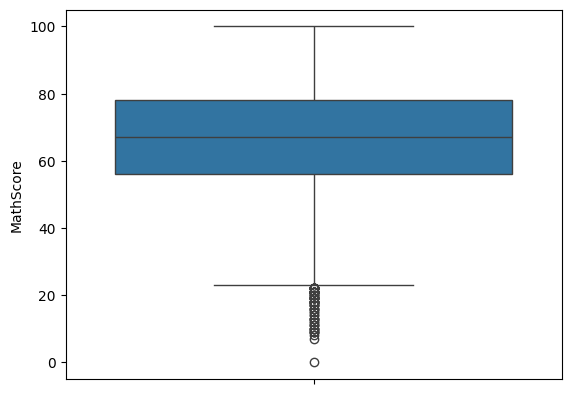

In [9]:
sns.boxplot(data=df, y='MathScore') # Определим выбросы для показателя балла по математике графическим методом
# На графике видно, что из общей совокупности выделяются учащиеся, получившие менее 20ти баллов по математике

<Axes: ylabel='MathScore'>

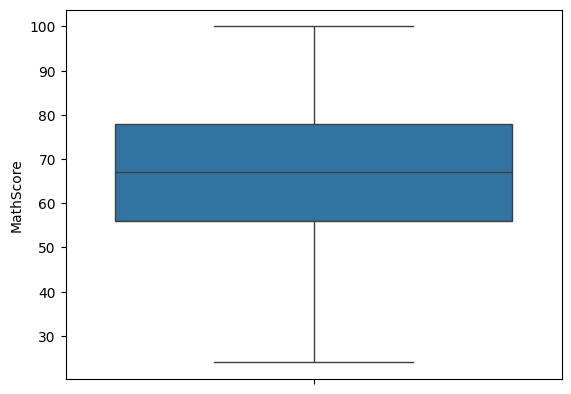

In [10]:
# удаляем выбросы при помощи метода межквартильного размаха
Q1 = df['MathScore'].quantile(0.25) # Расчитываем нижний квартиль
Q3 = df['MathScore'].quantile(0.75) # Расчитываем верхний квартиль
IQR = Q3 - Q1 # Межквартильный размах
df = df[(df['MathScore'] < Q3 + 1.5 * IQR) & (df['MathScore'] > Q1 - 1.5 * IQR)] # Отбираем только те значения датафрейма, в которых
# переменная MathScore меньше чем верхний квартиль + 1,5 * межквартильный размах и больше чем нижний квартиль + 1,5 * межквартильный размах
sns.boxplot(data=df, y='MathScore') # проверяем графическим методом

Для повышения качества данных можно анализировать смысловые взаимосвязи между различными столбцами в наборе данных. Примеры:  
**1. Противоречия в данных.** Например, если в одном столбце указано, что человек живёт в Москве, а в другом — что он живёт в Санкт-Петербурге, то это является противоречием.  
**2. Проверка на логику.** Например, если в столбце с возрастом указаны отрицательные значения, то это не может быть правдой.  
**3. Анализ связей между столбцами.** Например, если в столбце с зарплатой указаны очень большие значения, а в столбце с образованием — только начальное, то это может указывать на ошибку в данных.  
Не существует единого подхода к выявлению противоречий в информации, поэтому правила создаются в зависимости от задачи и данных. Для наших данных об учащихся можно выделить следующие правила: в семье, где ребенок не является первым показатель NrSiblings (к-во братьев и сестер) не должен равняться 0; если учащийся проходил тесты подготовки к экзамену и еженедельно занимался более 10-ти часов, то его результат не может быть менее среднего.

In [11]:
# Выведем к-во строк с противоречием
print('К-во записей с противоречием в количестве братьев/сестер:',df[(df['IsFirstChild']=='no')&(df['NrSiblings']==0)].shape[0])
# Условие для фильтрации: df[ <Не первый ребенок в семье> И <Нет братьев/сестер>]

print('К-во записей с противоречием в подготовке к математике:',df[(df['TestPrep']=='completed')&(df['WklyStudyHours']=='> 10')&(df['MathScore']<df['MathScore'].mean())].shape[0])
# Условие для фильтрации: df[ <Пройден курс подготовки к экзамену> И <Более 10-ти часов занятий в неделю> И <Балл по математике меньше стреднего>]
# Аналогично для других дисциплин:
print('К-во записей с противоречием в подготовке к чению:',df[(df['TestPrep']=='completed')&(df['WklyStudyHours']=='> 10')&(df['ReadingScore']<df['ReadingScore'].mean())].shape[0])
print('К-во записей с противоречием в подготовке к письму:',df[(df['TestPrep']=='completed')&(df['WklyStudyHours']=='> 10')&(df['WritingScore']<df['WritingScore'].mean())].shape[0])
# Заметим, что достаточно малый процент учащихся из всего набора данных плохо усвоили курсы подготовки

К-во записей с противоречием в количестве братьев/сестер: 0
К-во записей с противоречием в подготовке к математике: 563
К-во записей с противоречием в подготовке к чению: 562
К-во записей с противоречием в подготовке к письму: 465


In [12]:
# В Python предусмотрены библиотеки для предварительного анализа данных
# Например, библиотека ydata_profiling выводит отчет с информацией о каждой переменной, дублирующихся записей, пропусках и пр.
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Отчет по профилированнию данных")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### 3. Преобразование данных
На текущем этапе выполняется приведение данных к единому виду, шкалам измерения, создание новых показателей из существующих и пр. В основном данные подходы используются в машинном обучении для чувствительных алгоритмов (например, в данных об учащихся существуют текстовые показатели. При построении регресионной модели алгоритм выдаст ошибку, поскольку не сможет рассчитать математические формулы по текстовым данным). Преобразование данных содержит следущие этапы:

**1.Приведение типов данных**  
На данном этапе проверяется соответсвие числовых типов данных, например, данные типа float или decimal переводятся в тип int для обеспечения качества данных или оптимизации памяти. Вторым этапом кодируются категориальные данные из текстовых в числовые, это можно сделать несколькими способами:
- label encoding - метод, преобразующий текстовые категории в набор чисел от 1 до к-ва категорий (например, пол "мужской" и "женский" в данных можно заменить на 0 и 1, где 0 - "мужской", 1- "женский")
- ordinal encoder - метод, похожий на label encoding, но учитывающий порядок данных (например, уровень образования родителей обозначается как  школа, колледж, институт может быть закодирован как 1, 2, 3, т.е. 1 - школа, 2 - колледж, 3 - институт)
- one hot encoding - данный метод создает новые бинарные переменные для каждой категории, где 1 - принадлежит к категории, 0 - не принадлежит к категории. 

**2.Нормализация**  
Нормализация -  метод предобработки числовых признаков в данных с целью приведения их к некоторой общей шкале без потери информации о различии диапазонов (например, приведение показателей среднего балла студента и к-ва часов, проведенных за обучением к единой шкале). Цель нормализации - привести переменные к одинаковому масштабу для уменьшения влияния размаха данных на итоговый результат статистического алгоритма. Основные методы нормализации:  
- Десятичное масштабирование - в данном методе показатель масштабируется за счет переноса точки после запятой на число разрядов. Например, набор данных [100, 200, 900] после масштабирования примет вид [0.1, 0.2, 0.9]. Такой метод понижает изменчивость показателя, что может повлиять на итоговый результат.    
- Минимаксная нормализация - нормализация в данном методе происходит по формуле: *X' = (X - Xmin)/(Xmax - Xmin)*, где X' - новое значение, X - текущее значение показателя. Полученные значения находятся в шкале от 0 до 1.      
- Нормализация средним (Z-нормализация) - данный метод учитывает возможные выбросы в показателе и расчитывает новые значения при помощи среднего и стандартного отклонения. Формула выглядит следующим образом: *X' = (X - mean)/std*, где mean - среднее, std - стандартное отклонение. В результате значение среднего становится равным 0, а стандартное отклонение равняется 1. 

**3.Создание новых признаков (Feature engineering)**  
Feature engineering - это процесс создания новых признаков из имеющихся данных. Используется преимущественно в алгоритмах машинного обучения для повышения точности моделей. 

**4.Обогащение данных (Data enrichment)**  
Data enrichment - это процесс дополнения исходного массива данных, позволяющий повысить значимость результатов. Например, мы хотим установить связь между отличниками и их знаком зодиака, в таком случае добавление даты рождения к ученику - это процесс обогащения данными, а кодировка по знакам зодиака - создание новых признаков.  

Рассмотрим на примере процесс преобразования признаков:

In [13]:
# Посмотреть уникальные категории можно при помощи функции .unique()
df['Gender'].unique()

array(['female', 'male'], dtype=object)

In [14]:
# Преобразуем показатель Gender в числовой признак при помощи метода label encoding
df['Gender_label_encoding']=pd.factorize(df['Gender'])[0] # Используем функцию pd.factorize
# factorize возвращает два массива - закодированная переменная и уникальные значения категории
# Поэтому при записи в столбец используем индексацию [0]
df['Gender_label_encoding'].unique() # Выводим уникальные закодированные категории

array([0, 1])

In [15]:
# Преобразуем показатель class в числовой признак при помощи метода ordinal encoder
# Так как показатель class имеет порядковый тип данных задаем последовательность категорий
category = {
    'some high school': 1,
    'high school': 2,
    'some college': 3,
    "associate's degree": 4,
    "bachelor's degree":  5,
    "master's degree": 6
}
df['ParentEduc'] =df['ParentEduc'].astype('category') # Изменяем тип данных
df['ParentEduc_ordinal_encoder'] = df['ParentEduc'].cat.rename_categories(category) # При помощи метода rename_categories заменяем категории на числа
df['ParentEduc_ordinal_encoder'].unique() # Выводим численные категории

[5, 3, 6, 4, 2, 1]
Categories (6, int64): [4, 5, 2, 6, 3, 1]

In [16]:
# Преобразуем показатель PracticeSport в числовой признак при помощи метода one hot encoding
df = pd.get_dummies(df, columns=['PracticeSport' ], dtype= int) # Кодировка реализуется методом pd.get_dummies

In [17]:
# Результаты кодировки
df[['Gender_label_encoding','ParentEduc_ordinal_encoder','PracticeSport_never','PracticeSport_regularly','PracticeSport_sometimes','PracticeSport_Не указан' ]].head()

,Gender_label_encoding,ParentEduc_ordinal_encoder,PracticeSport_never,PracticeSport_regularly,PracticeSport_sometimes,PracticeSport_Не указан
0,0,5,0,1,0,0
1,0,3,0,0,1,0
2,0,6,0,0,1,0
3,1,4,1,0,0,0
4,1,3,0,0,1,0


In [18]:
# Реализуем нормализацию численной переменной NrSiblings
df['NrSiblings_scaling'] = df['NrSiblings']/10 # Десятичное масштабирование
df['NrSiblings_min_max'] = (df['NrSiblings'] - df['NrSiblings'].min()) / (df['NrSiblings'].max() - df['NrSiblings'].min()) # Манимаксная нормализация
df['NrSiblings_z'] = (df['NrSiblings'] - df['NrSiblings'].mean()) / df['NrSiblings'].std() # Нормализация средним

In [19]:
# Результаты нормализации
df[['NrSiblings', 'NrSiblings_scaling', 'NrSiblings_min_max','NrSiblings_z' ]].head()

,NrSiblings,NrSiblings_scaling,NrSiblings_min_max,NrSiblings_z
0,3.0,0.3,0.428571,0.606120
1,0.0,0.0,0.000000,-1.505313
2,4.0,0.4,0.571429,1.309931
3,1.0,0.1,0.142857,-0.801502
4,0.0,0.0,0.000000,-1.505313


### Задание 1  
1. Скачать данные по ссылке https://www.kaggle.com/datasets/amruthayenikonda/dirty-dataset-to-practice-data-cleaning  
2. Загрузить в python при помощи функции pd.read_csv('<Название файла>')  
3. Провести профилированние данных, очистку от пропусков, ненужных символов, привести типы данных
4. Придумать собственные метрики качества и реализовать их    

### Задание 2  
1. Скачать данные по ссылке https://www.kaggle.com/datasets/pavantanniru/-datacleaningforbeginnerusingpandas/data
2. Повысить качество данных
3. Привести переменную Salary к численному типу тремя способами (например, минимум, максимум и середина интервала)
4. Для кадого способа расчитать среднее, медиану, дисперсию с учетом выбросов и без
5. Из п.3 выбрать один из методов преобразования и обосновать выбор